# Reproducibility of Enhancement of E-Learning Student’s Performance Based on Ensemble Techniques by Abdulkream A. Alsulami, Abdullah S. AL-Malaise AL-Ghamdi, & Mahmoud Ragab (2023, Electronics)


Author: Amy Tan (amyjxtan@gmail.com)

Date: 11/15/2024

## Introduction

The original paper, ["Enhancement of E-Learning Student’s Performance Based on Ensemble Techniques"](https://github.com/ucsd-psych201a/alsulami2023/blob/main/original_paper/Enhancement_of_ELearning_Students_Performance_Based_on_Ensemble_Techniques.pdf), aimed to improve educational data mining, or EDM, specifically in regards to electronic learning (e-learning) since the COVID-19 pandemic saw a surge in E-learning programs. EDM involves developing methods to deal with the different types of data in educational systems to improve students’ learning outcomes. In particular, the researchers sought to predict student performance using decision trees, naive Bayes, and random forests, enhancing the accuracy further through bagging and boosting. Researchers ultimately concluded that most accurate model methods used decision trees, coupled with boosting, resulting in an accuracy of 0.77.

In my project, I sought to reproduce their findings and their visualizations in Python. I anticipated the largest challenges to be implementing the various EDM techniques as I wasn't extremely well-versed in either of them. However, I was confident that the challenge would not prove too difficult, and would be an extremely valuable learning experience. I chose this particular paper to reproduce since it fit into my niche of interests. The work I hope to do in the future involves an intersection of education, cognitive science, and computational tools - this paper provided the opportunity to further my knowledge and skills in how computational tools can and are used to better our education system. My work is available in my [project repository](https://github.com/ucsd-psych201a/alsulami2023/tree/main).


## Design Overview 

The paper's design did not include any manipulation of variables, but the data set contains 17 columns (measures) for 480 students. The gathering of the dataset and the following models that were built using it did not involve a within-participants or between-particiapnts design - measures were not repeated. If the dataset had been aimed at examining, for example, a specific learning method's effects on academic success, it could have been done either between or within subjects. The authors did not mention anything about reducing demand characteristics and since the paper isn't specifically aimed at determining a casual relationship, there aren't any confounds. I argue that more information in the original paper could be given on how the data was collected and why they chose to measure the specific variables they did. Without additional information, we are forced to take the dataset at face value and it's difficult to critically examine the data set design choices. There are limits to the models and their generalizability - since the data they are using are do not include folks from Western countries, it's difficult to say that this model would be accurate when applied to a different data set. 

## Project Progress Check 1

The outcome measure for the success or failure of this reproduction project is if, out of all the models and data mining techniques, a decision tree with boosting proves to have the highest accuracy (around 0.77. The goal of the original paper was not focused on a particular test or hypothesis, but rather examining which model could be most effectively used to predict student success; likewise, my project aims to assess if the model they found is, in fact, the most accurate. As mentioned in the Methods section below, the accuracy will be computed using the formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

My coding progress is under the Results section: I have finished data preprocessing - I have cleaned the dataset to have consist column names and values, fixing inconsistent capitalization and punctuation. Additionally I have written the code to split my dataset into training and testing - 30% is training and 70% is testing currently. I'm in the process still of writing the code to create model to train and test these data on. 

## Project Progress Check 2

OSF link: https://drive.google.com/file/d/1UwpaHqpqgH80V7wa0M6RtfjgXgexiNbX/view?usp=sharing

I've finished wrangling my data, turning all categorical columns into numerical ones - the finished table is saved as `edu_dummy`. I've also created a markdown table containing what each numerical value corresponds to. The code to split the data set into training/testing has been completed, and I've successfully coded in the basic decision tree, naive bayes (ADA), and random forest models, along with calculating a confusion matrix that gives all neccessary computations to compare results to the original paper. Additionally, I've started working on incoporating the bagging, boosting, and voting methods, but I've only applied these to the decision tree model thus far. 

## Project Progress Check 3

I rewrote and restructured the code I had under the confirmatory analysis to now use the function I created called `evaluate_model` to reduce repetition and make my code more efficient. I reproduced the accuracy graph with the 3 original data mining (DM) techniques, and successfully created and ran the remaining models from the paper, to a total of 15 - these are stored in the dictionary `results` where the key corresponds to the model run, and the value is a list of values rounded to the hundredth place containing the model's [accuracy, precision, recall, and f-measure/f1 score]. 

All I have left to do is to replicate the remaining tables and figures given in the original paper using the values in `results`, and I should be good to go!

## Methods
### Materials

#### The Data/Sample

The dataset used in this project (provided in the data folder in `xAPI-Edu-Data.csv`, and also available on [Kaggle](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data)) is the exact one used in the original paper. It was "obtained from the Kalboard 360 E-Learning system via the Experience API (XAPI). The data set in this study consists of 480 records with 17 attributes." All attributes are either integer or categorical and are generally categorized into three major attribute types: demographic, academic, and behavioral.

### Procedure

"First, we collect the data set and prepare it to perform the study. Then, three traditional data mining methods will apply (decision tree (DT), naïve Bayes (NB), and random forest (RF)) to produce a performance model. In addition to the classifiers mentioned earlier, two ensemble methods are used to improve their performance. Boosting, as well as bagging, is applied to enhance the student prediction model’s success. Two and three methods were added to each ensemble technique using the voting process for a more accurate prediction. The model’s last phase will involve evaluating and discussing the results. The data were divided into training and test sets. Each prediction model’s performance was evaluated using K-fold cross-validation. When testing a model, this technique is used to solve the variance problem. In brief, k-fold cross-validation divides the training set into 10 folds. During training, 9 folds are applied before the final fold is tested. As an average of the different accuracies is taken, this better represents the model performance. The method was repeated ten times. All models were run with the WEKA software’s default parameters." My analysis differs in that the models will be built and run in Python.

### Analysis Plan

#### Data Cleaning

"As part of preprocessing, data cleaning is essential for removing irrelevant objects and missing values in the data collection. There are zero missing values in the data set." Though the authors do not specifically mention this, I cleaned the data set with specific regard to the `NationalITy`, `PlaceofBirth`, and `StageID` columns to ensure that column contents were consistent in their usage of capitalization and abbreviations (or lack thereof). I did not exclude any of the data from the provided data set.

#### Features Selection

"Feature selection refers to selecting the relevant features of a dataset based on specific criteria from an original feature set. There are two types of data reduction methods: wrapper methods and filter methods. The filter method ranks the features using variable ranking methods, with the highly ranked features being selected and implemented into the learning algorithm. In this study, the information gain ranking filter and a correlation- ranking filter were used. At each decision tree node, and in order to select the test attribute, the information gain measure is taken into account. The information gain (IG) metric determines features with a large number of values. It is calculated with Equation (1).

$$IG(T, a) = H(T) − H(T|a)   (1)$$

where $T$ is a random variable and $H(T|a)$ is the entropy of $T$ given the value of attribute a.

Correlation coefficients are applied to measure correlations among attributes and classes and inter-correlations between features. It is calculated with Equation (2).

$$\rho(X,Y) = \frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}$$

where:

-   $X$ and $Y$ are the two variables being correlated
-   $n$ is the number of data points
-   $x_i$ and $y_i$ are the values of $X$ and $Y$ for the data point
-   $\bar{x}$ and $\bar{y}$ are the means of $X$ and $Y$
-   $\text{cov}(X,Y)$ is the covariance between $X$ and $Y$"

#### Data Mining Tool and Model Creation

After the most relevant features were selected, I used these to create a decision tree (DT), naïve Bayes (NB), and random forest (RF) classifiers. However, as previously mentioned, my project will not use WEKA, but Python. I anticipated using [skit-learn](https://scikit-learn.org/stable/) to accomplish building and testing these models. Following that, I applied boosting and bagging to all the models to test potential improvements."

#### Measurement Measures

"Different DM techniques were compared to determine which had higher prediction accuracy than others, and a decision was made based on that. The following common metrics can evaluate a study’s performance: accuracy, precision, recall, and F-Measure." Thus, my project also examined all four measurements of accuracy to see if I could reproduce a similar finding that **decision trees with boosting had the highest accuracy of 0.77**. The following includes how the authors calculated each of the following, for which I followed suit.

##### Accuracy

"This represents the classifier’s accuracy and relates to the classifier’s capacity. The accuracy of a predictor relates to the way it accurately predicts the impact of a predicted fea- ture for new information. The percentage of correct predictions divided by the total number of predictions yields the accuracy. It is calculated with the following Equation (3):

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

where: 
- True positives ($TP$): cases that are predicted as yes. 
- True negatives ($TN$): cases that are predicted as no. 
- False positives ($FP$): cases that are predicted yes and are actually yes. 
- False negatives ($FN$): cases that are predicted as no but are actually yes.

##### Precision

Precision is calculated as the ratio of correctly classified positive predictions to total positive predictions, whether correctly or incorrectly classified. It is calculated with Equation (4).

$$Precision = \frac{TP}{TP + FP}$$

##### Recall

The recall is determined by calculating the proportion of correctly classified positive predictions to all positive predictions. It is calculated with Equation (5).

$$Recall = \frac{TP}{TP + FN}$$

##### F-Measure

F-measure conveys both recall and precision in a single measure. It is calculated with Equation (6)."

$$ F1 − measure = (2 ∗ Recall ∗ Precision)/(Recall + Precision)$$

### Differences from Original Study

Again, a key difference between this reproducibility project and the original paper are the computational tools used. The original paper used WEKA to visualize and perform machine learning/ensemble methods, whereas my project will use Python. Current anticipated packages include [seaborn](https://seaborn.pydata.org/index.html) and [skit-learn](https://scikit-learn.org/stable/). Additionally, I plan to clean the data using [pandas](https://pandas.pydata.org/) to ensure that entries are consistent, but I do not anticipate any changes I made to make a difference in the findings.



### Methods Addendum (Post Data Collection)

You can comment this section out prior to final report with data collection.

#### Actual Sample

Sample size, demographics, data exclusions based on rules spelled out in analysis plan

#### Differences from pre-data collection methods plan

Any differences from what was described as the original plan, or “none”.

## Results

### Data preparation

Data preparation following the analysis plan.

In [1]:
#### Load Relevant Libraries and Functions

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier


#### Import data

edu = pd.read_csv('../data/xAPI-Edu-Data.csv')

#### Data exclusion / filtering - NA

#### Prepare data for analysis - create columns etc.

# Clean dataset column names 
edu.columns = edu.columns.str.title()

# Clean Placeofbirth column to clean random capitalization
edu["Placeofbirth"] = edu["Placeofbirth"].str.title()


# Clean Stageid column to clean random capitalization
edu["Stageid"] = edu["Stageid"].str.lower()

# Create a function to turn KW abbrevations into Kuwait for entry consistency in Nationality column
def kuwait (string):
    if string == 'KW':
        return 'Kuwait'
    else:
        return string 
    
# Apply function kuwait to Nationality column
edu['Nationality'] = edu['Nationality'].apply(kuwait).str.title()

# Double check that all cleaning was correct:
edu.head()

,Gender,Nationality,Placeofbirth,Stageid,Gradeid,Sectionid,Topic,Semester,Relation,Raisedhands,Visitedresources,Announcementsview,Discussion,Parentansweringsurvey,Parentschoolsatisfaction,Studentabsencedays,Class
0,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


From here, I'm essentially creating functions to change my categorical variables into numerical values in order to fit the following ML models.

The following table shows how each categorical variable was changed into a numerical value:

| **Column**               | **Category** | **Numerical Representation** |
|:-------------------------|:-------------|:-----------------------------|
| Gender                   | Male         | 0                            |
|                          | Female       | 1                            |
| Nationality              | Kuwait       | 0                            |
|                          | Lebanon      | 1                            |
|                          | Egypt        | 2                            |
|                          | Saudiarabia  | 3                            |
|                          | Usa          | 4                            |
|                          | Jordan       | 5                            |
|                          | Venzuela     | 6                            |
|                          | Iran         | 7                            |
|                          | Tunis        | 8                            |
|                          | Morocco      | 9                            |
|                          | Syria        | 10                           |
|                          | Palestine    | 11                           |
|                          | Iraq         | 12                           |
|                          | Lybia        | 13                           |
| Stageid                  | lowerlevel   | 0                            |
|                          | middleschool | 1                            |
|                          | highschool   | 2                            |
| Gradeid                  | G-02         | 2                            |
|                          | G-04         | 4                            |
|                          | G-05         | 5                            |
|                          | G-06         | 6                            |
|                          | G-07         | 7                            |
|                          | G-08         | 8                            |
|                          | G-09         | 9                            |
|                          | G-10         | 10                           |
|                          | G-11         | 11                           |
|                          | G-12         | 12                           |
| Sectionid                | A            | 0                            |
|                          | B            | 1                            |
|                          | C            | 2                            |
| Topic                    | IT           | 0                            |
|                          | Math         | 1                            |
|                          | Arabic       | 2                            |
|                          | Science      | 3                            |
|                          | English      | 4                            |
|                          | Quran        | 5                            |
|                          | Spanish      | 6                            |
|                          | French       | 7                            |
|                          | History      | 8                            |
|                          | Biology      | 9                            |
|                          | Chemistry    | 10                           |
|                          | Geology      | 11                           |
| Semester                 | F            | 0                            |
|                          | S            | 1                            |
| Relation                 | Father       | 0                            |
|                          | Mum          | 1                            |
| Parentansweringsurvey    | No           | 0                            |
|                          | Yes          | 1                            |
| Parentschoolsatisfaction | Bad          | 0                            |
|                          | Good         | 1                            |
| Studentabsencedays       | Under-7      | 0                            |
|                          | Above-7      | 1                            |
| Class                    | M            | 0                            |
|                          | L            | 1                            |
|                          | H            | 2                            |

In [2]:
# Function for Gender column
def dummy_gender(string):
    """
    Replaces 'M' with 0 and 'F' with 1.
    
    Parameters:
    string = a string, either 'M' or 'F'
    
    Returns:
    0 or 1
    """
    
    if string == 'M':
        return 0
    elif string == 'F':
        return 1

# Creating a dictionary to reference countries to an integer, numerical value
countries = {'Kuwait': 0, 'Lebanon': 1,  'Egypt': 2, 'Saudiarabia': 3, 'Usa': 4, 'Jordan': 5,
       'Venzuela': 6, 'Iran': 7, 'Tunis': 8, 'Morocco': 9, 'Syria': 10, 'Palestine': 11,
       'Iraq': 12, 'Lybia': 13}

# Function for Nationality column
def dummy_country(string):
    """
    Takes a given country and returns its respective integer.
    
    Parameters:
    string = a string, one of the countries contained in the countries dictionary
    
    Returns:
    An integer
    """
    
    return countries[string]
    
# Function for Stageid column
def dummy_stageid(string):
    """
    Takes a given schooling level and returns its respective integer.
    
    Parameters: 
    string = a string, a schooling level (stage id)
    
    Returns:
    An integer
    """
    
    if string == 'lowerlevel':
        return 0
    elif string == 'middleschool':
        return 1
    elif string == 'highschool':
        return 2
        
# Creating a dictionary to reference grade levels to an integer, numerical value
grade = {'G-04': 4, 'G-07': 7, 'G-08': 8, 'G-06': 6, 'G-05': 5, 'G-09': 9, 'G-12': 12, 'G-11': 11,
       'G-10': 10, 'G-02': 2}

# Function for Gradeid
def dummy_gradeid(string):
    """
    Takes a given grade level and returns its respective integer.
    
    Parameters: 
    string = a string, a grade level (grade id)
    
    Returns:
    An integer
    """
    
    return grade[string]

# Function for Sectionid column
def dummy_sectionid(string):
    """
    Takes a given section id and returns its respective integer.
    
    Parameters: 
    string = a string, a section
    
    Returns:
    An integer
    """
    
    if string == 'A':
        return 0
    elif string == 'B':
        return 1
    elif string == 'C':
        return 2
    
# Creating a dictionary to reference topics levels to an integer, numerical value
topics = {'IT': 0, 'Math': 1, 'Arabic': 2, 'Science': 3, 'English': 4, 'Quran': 5, 'Spanish': 6,
       'French': 7, 'History': 8, 'Biology': 9, 'Chemistry': 10, 'Geology': 11}

# Function for Topic column
def dummy_topic(string):
    """
    Takes a given topic and returns its respective integer.
    
    Parameters: 
    string = a string, a topic
    
    Returns:
    An integer
    """
    
    return topics[string]

# Function for Semester column
def dummy_semester(string):
    """
    Takes a given semester and returns its respective integer.
    
    Parameters: 
    string = a string, a topic
    
    Returns:
    An integer
    """
    
    if string == 'F':
        return 0
    elif string == 'S':
        return 1

# Function for Relation column
def dummy_relation(string):
    """
    Replaces 'Father' with 0 and 'Mum' with 1.
    
    Parameters:
    string = a string
    
    Returns:
    0 or 1
    """
    
    if string == 'Father':
        return 0
    elif string == 'Mum':
        return 1
    
# Function for Parentansweringsurvey column
def dummy_survey(string):
    """
    Replaces 'No' with 0 and 'Yes' with 1.
    
    Parameters:
    string = a string
    
    Returns:
    0 or 1
    """
    
    if string == 'No':
        return 0
    elif string == 'Yes':
        return 1
    
# Function for Parentschoolsatisfaction column
def dummy_satisfaction(string):
    """
    Replaces 'Bad' with 0 and 'Good' with 1.
    
    Parameters:
    string = a string
    
    Returns:
    0 or 1
    """
    
    if string == 'Bad':
        return 0
    elif string == 'Good':
        return 1
 

 # Function for Studentabsencedays column
def dummy_absences(string):
    """
    Replaces 'Under-7' with 0 and 'Above-7' with 1.
    
    Parameters:
    string = a string
    
    Returns:
    0 or 1
    """
    
    if string == 'Under-7':
        return 0
    elif string == 'Above-7':
        return 1
    
# Function for Class column
def dummy_class(string):
    """
    Takes a given class and returns its respective integer.
    
    Parameters: 
    string = a string, a class
    
    Returns:
    An integer
    """
    
    if string == 'M':
        return 0
    elif string == 'L':
        return 1
    elif string == 'H':
        return 2

In [3]:
# Create a new dataset to store all changes
edu_dummy = edu

# Apply all previously defined functions
edu_dummy['Gender'] = edu_dummy['Gender'].apply(dummy_gender)
edu_dummy['Nationality'] = edu_dummy['Nationality'].apply(dummy_country)
edu_dummy['Placeofbirth'] = edu_dummy['Placeofbirth'].apply(dummy_country)
edu_dummy['Stageid'] = edu_dummy['Stageid'].apply(dummy_stageid)
edu_dummy['Gradeid'] = edu_dummy['Gradeid'].apply(dummy_gradeid)
edu_dummy['Sectionid'] = edu_dummy['Sectionid'].apply(dummy_sectionid)
edu_dummy['Topic'] = edu_dummy['Topic'].apply(dummy_topic)
edu_dummy['Semester'] = edu_dummy['Semester'].apply(dummy_semester)
edu_dummy['Relation'] = edu_dummy['Relation'].apply(dummy_relation)
edu_dummy['Parentansweringsurvey'] = edu_dummy['Parentansweringsurvey'].apply(dummy_survey)
edu_dummy['Parentschoolsatisfaction'] = edu_dummy['Parentschoolsatisfaction'].apply(dummy_satisfaction)
edu_dummy['Studentabsencedays'] = edu_dummy['Studentabsencedays'].apply(dummy_absences)
edu_dummy['Class'] = edu_dummy['Class'].apply(dummy_class)

In [4]:
# edu_dummy.to_csv('edu_dummy.csv', index=False)
edu_dummy

,Gender,Nationality,Placeofbirth,Stageid,Gradeid,Sectionid,Topic,Semester,Relation,Raisedhands,Visitedresources,Announcementsview,Discussion,Parentansweringsurvey,Parentschoolsatisfaction,Studentabsencedays,Class
0,0,0,0,0,4,0,0,0,0,15,16,2,20,1,1,0,0
1,0,0,0,0,4,0,0,0,0,20,20,3,25,1,1,0,0
2,0,0,0,0,4,0,0,0,0,10,7,0,30,0,0,1,1
3,0,0,0,0,4,0,0,0,0,30,25,5,35,0,0,1,1
4,0,0,0,0,4,0,0,0,0,40,50,12,50,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,5,5,1,8,0,10,1,0,5,4,5,8,0,0,1,1
476,1,5,5,1,8,0,11,0,0,50,77,14,28,0,0,0,0
477,1,5,5,1,8,0,11,1,0,55,74,25,29,0,0,0,0
478,1,5,5,1,8,0,8,0,0,30,17,14,57,0,0,1,1


---

## Confirmatory analysis

### Traditional DM techniques


I first began by running a decision tree, naive bayes, and random forest alone to first compare their accuracy. Note, for all of the following models and analyses, I used a `random_state` of 12345 for the 10-fold cross-validation. 

The variable `results` stores each model's metrics with the model name (as a stirng) as the key, and a list as the value where index 0: accuracy, 1: precision, 2: recall, 3: f1.


In [5]:
# Define Y as what we're trying to classify
Y = edu_dummy['Class']

# Define X as our predictors (all columns besides 'Class')
X = edu_dummy.drop('Class',axis=1)

# Set up 10-fold cross-validation with 10 repetitions
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=12345)

# empty dictionary to store each model's metrics
results = {}

# create a function to store each model's performance metrics
def evaluate_model(model, X, Y):
    metrics = []
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }
    
    scores = cross_validate(model, X, Y, cv=rskf, scoring=scoring)
    
    # Store means (as percentages)
    metrics = [
        round(scores['test_accuracy'].mean() * 100, 2),
        round(scores['test_precision'].mean(), 3),
        round(scores['test_recall'].mean(), 3),
        round(scores['test_f1'].mean(), 3)
    ]
    
    return metrics

In [6]:
# Decision Tree
dt = DecisionTreeClassifier()
results['DT'] = evaluate_model(dt, X, Y)

# Naive Bayes
nb = GaussianNB()
results['NB'] = evaluate_model(nb, X, Y)

# Random Forest
rf = RandomForestClassifier(
#     n_estimators=100,        # Equivalent to -I 100 (number of trees)
#     max_features='sqrt',      # Equivalent to -K 0 (use all features)
#     min_samples_split=2,      # Equivalent to -M 1.0 (minimum samples for split)
#     min_samples_leaf=1,       # Equivalent to -M 1.0 (minimum samples per leaf)
#     random_state=1,           # Equivalent to -S 1 (random seed for reproducibility)
#     n_jobs=1                  # Equivalent to -num-slots 1 (number of threads)
)
results['RF'] = evaluate_model(rf, X, Y)

In [7]:
results

{'DT': [72.85, 0.737, 0.729, 0.727],
 'NB': [73.92, 0.749, 0.739, 0.734],
 'RF': [79.73, 0.807, 0.797, 0.796]}

### Traditional DM techniques with Ensemble Methods

I then added on the ensemble methods the authors described, with the `results` dictionary now storing the metrics from all 15 models run.

#### Boosting

Note that boosting is not traditionally used with Naive Bayes, but for the sake of reproducing the original paper, I followed suit. Additionally the methodology of the original paper states that one experiment was "boosting with naïve Bayes and random forest" - however; following tables and analysis demonstrate the researchers actually using boosting with naïve Bayes and decision trees. Thus, it is worth noting that I decided to run boosing with naïve Bayes.

In [8]:
# AdaBoost with Decision Tree (Boosting DT)
adaboost_dt = AdaBoostClassifier(estimator=dt, random_state=12345, algorithm='SAMME')
results['Boosting+DT'] = evaluate_model(adaboost_dt, X, Y)  # Store all metrics for Boosting Decision Tree

# AdaBoost with Naive Bayes (Boosting Naive Bayes)
adaboost_nb = AdaBoostClassifier(estimator=nb, random_state=12345, algorithm='SAMME')
results['Boosting+NB'] = evaluate_model(adaboost_nb, X, Y)  # Store all metrics for Boosting Naive Bayes

# AdaBoost with Random Forest (Boosting RF)
adaboost_rf = AdaBoostClassifier(estimator=rf, random_state=12345, algorithm='SAMME')
results['Boosting+RF'] = evaluate_model(adaboost_rf, X, Y)  # Store all metrics for Boosting Random Forest

# AdaBoost with Naive Bayes and Decision Tree
voting_clf = VotingClassifier(estimators=[('nb', nb), ('dt', dt)], voting='hard')
adaboost_voting = AdaBoostClassifier(estimator=voting_clf, random_state=12345, algorithm='SAMME')
results['Boosting+DT+NB'] = evaluate_model(adaboost_voting, X, Y)

# AdaBoost with Random Forest and Decision Trees 
voting_clf = VotingClassifier(estimators=[('rf', rf), ('dt', dt)], voting='hard')
adaboost_voting = AdaBoostClassifier(estimator=voting_clf, random_state=12345, algorithm='SAMME')
results['Boosting+RF+DT'] = evaluate_model(adaboost_voting, X, Y)

# Voting with AdaBoost with Decision Tree, Naive Bayes, and Random Forest
voting_clf = VotingClassifier(estimators=[('dt', dt), ('nb', nb), ('rf', rf)], voting='hard')
adaboost_voting = AdaBoostClassifier(estimator=voting_clf, random_state=12345, algorithm='SAMME')
results['Boosting+NB+RF+DT'] = evaluate_model(adaboost_voting, X, Y)

#### Bagging

In [9]:
# Bagging with Decision Tree
bagging_dt = BaggingClassifier(estimator=dt, random_state=12345)
results['Bagging+DT'] = evaluate_model(bagging_dt, X, Y)  # Store all metrics for Bagging Decision Tree

# Bagging with Naive Bayes
bagging_nb = BaggingClassifier(estimator=nb, random_state=12345)
results['Bagging+NB'] = evaluate_model(bagging_nb, X, Y)  # Store all metrics for Bagging Naive Bayes

# Bagging with Random Forest
bagging_rf = BaggingClassifier(estimator=rf, random_state=12345)
results['Bagging+RF'] = evaluate_model(bagging_rf, X, Y)  # Store all metrics for Bagging Random Forest

# Bagging with Naive Bayes and Decision Tree
voting_clf = VotingClassifier(estimators=[('nb', nb), ('dt', dt)], voting='hard')
bagging_voting = BaggingClassifier(estimator=voting_clf, random_state=12345)
results['Bagging+DT+NB'] = evaluate_model(bagging_voting, X, Y)

# Bagging with Random Forest and Decision Trees
voting_clf = VotingClassifier(estimators=[('rf', rf), ('dt', dt)], voting='hard')
bagging_voting = BaggingClassifier(estimator=voting_clf, random_state=12345)
results['Bagging+RF+DT'] = evaluate_model(bagging_voting, X, Y)

# Bagging with Decision Tree, Naive Bayes, and Random Forest
voting_clf = VotingClassifier(estimators=[('dt', dt), ('nb', nb), ('rf', rf)], voting='hard')
bagging_voting = BaggingClassifier(estimator=voting_clf, random_state=12345)
results['Bagging+NB+RF+DT'] = evaluate_model(bagging_voting, X, Y)

In [10]:
results

{'DT': [72.85, 0.737, 0.729, 0.727],
 'NB': [73.92, 0.749, 0.739, 0.734],
 'RF': [79.73, 0.807, 0.797, 0.796],
 'Boosting+DT': [72.81, 0.736, 0.728, 0.726],
 'Boosting+NB': [73.92, 0.749, 0.739, 0.734],
 'Boosting+RF': [79.9, 0.808, 0.799, 0.798],
 'Boosting+DT+NB': [75.23, 0.765, 0.752, 0.75],
 'Boosting+RF+DT': [77.38, 0.798, 0.774, 0.771],
 'Boosting+NB+RF+DT': [79.98, 0.806, 0.8, 0.799],
 'Bagging+DT': [76.62, 0.776, 0.766, 0.765],
 'Bagging+NB': [73.94, 0.75, 0.739, 0.735],
 'Bagging+RF': [79.38, 0.805, 0.794, 0.793],
 'Bagging+DT+NB': [76.9, 0.797, 0.769, 0.766],
 'Bagging+RF+DT': [76.56, 0.798, 0.766, 0.761],
 'Bagging+NB+RF+DT': [78.9, 0.798, 0.789, 0.788]}

---

### Comparing Evaluation Results and Findings

---

#### 1. Boosting and Bagging Summary Tables

In [11]:
# Select results from the Boosted Models only
boosting_results = {key: value for key, value in results.items() if 'Boosting' in key}

# Clean keys to remove 'Boosting+' fromt the beginning
boosting_results = {key.lstrip('Boosting+ '): value for key, value in boosting_results.items()}

df_boosting = pd.DataFrame(boosting_results, index=['Accuracy', 'Precision', 'Recall', 'F-measure'])
df_boosting = df_boosting[['DT', 'RF', 'NB', 'DT+NB', 'RF+DT', 'NB+RF+DT']]
df_boosting

,DT,RF,NB,DT+NB,RF+DT,NB+RF+DT
Accuracy,72.810,79.900,73.920,75.230,77.380,79.980
Precision,0.736,0.808,0.749,0.765,0.798,0.806
Recall,0.728,0.799,0.739,0.752,0.774,0.800
F-measure,0.726,0.798,0.734,0.750,0.771,0.799


<div style="display: flex; justify-content: space-around;">
    <img src="images/classification with boosting.png" alt="Image 1" style="width: 85%;"/> </div>

In [12]:
# Select results from the Bagging Models only
bagging_results = {key: value for key, value in results.items() if 'Bagging' in key}
# Clean keys to remove 'Bagging+' from the beginning
bagging_results = {key.lstrip('Bagging+ '): value for key, value in bagging_results.items()}

df_bagging = pd.DataFrame(bagging_results, index=['Accuracy', 'Precision', 'Recall', 'F-measure'])
df_bagging = df_bagging[['DT', 'RF', 'NB', 'DT+NB', 'RF+DT', 'NB+RF+DT']]
df_bagging

,DT,RF,NB,DT+NB,RF+DT,NB+RF+DT
Accuracy,76.620,79.380,73.940,76.900,76.560,78.900
Precision,0.776,0.805,0.750,0.797,0.798,0.798
Recall,0.766,0.794,0.739,0.769,0.766,0.789
F-measure,0.765,0.793,0.735,0.766,0.761,0.788


<div style="display: flex; justify-content: space-around;">
    <img src="images/classification with bagging.png" alt="Image 1" style="width: 85%;"/> </div>

---

#### 2. Accuracy
After reproducing the tables I plotted their accuracies side-by-side to compare my results to those of the authors.

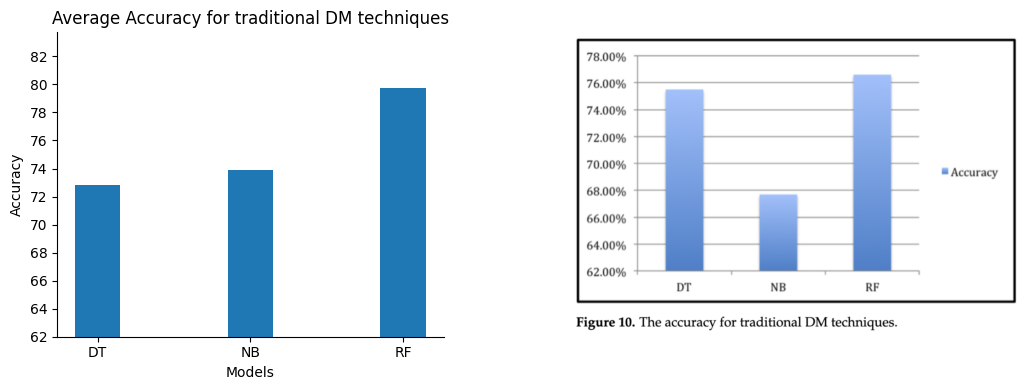

In [13]:
# Code to plot my models accuracies:
accuracies = [metrics[0] for metrics in results.values()][0:3]
models = list(results.keys())[0:3]

# Load in og figure
img = mpimg.imread('images/accuracy for traditional DM techniques.png')

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 2]})  # Increase the width of the image subplot

# Plotting the bar chart
ax[0].bar(models, accuracies, width=0.3)
ax[0].set_ylim(62.00)
ax[0].set_yticks(range(62, int(max(accuracies) + 4), 2))
ax[0].set_title('Average Accuracy for traditional DM techniques')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Accuracy')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Display the image on the second subplot
ax[1].imshow(img)
ax[1].axis('off')  # Hide the axis for the image

# Adjust layout to prevent overlap
plt.tight_layout()

The original findings are plotted on the right, while mine are on the left.

The authors found that "the accuracy values were above 65%. We observed that naïve Bayes had the lowest accuracy of 67.7% among all methods." While I was able to reproduce their above 65% accuracy (with all of my models performing above 70% accuracy), I instead observed that boosting with a decision tree (DT) had the lowest accuracy (72.81%)

As evidenced in the plots, the results I obtained are different from the original paper - the original authors found that random forests (RF) performed best (76.6%), followed closely by decision trees (DT) (75.5%), with naive bayes (NB) performing the worst (67.7%). However, while I still found random forests to perform the best (79.81%), they were followed by naive bayes (73.92%) with decision trees performing the worst (73.1%).

Additionally, the authors concluded that their proposed model (decision trees with boosting) "enhanced the accuracy effectively when we used ensemble methods with the traditional data mining separately (boosting + DT) and when we combined several classifiers (Boosting + DT + RF) using the voting process." They included the following figure below (right side) to illustrate this point.

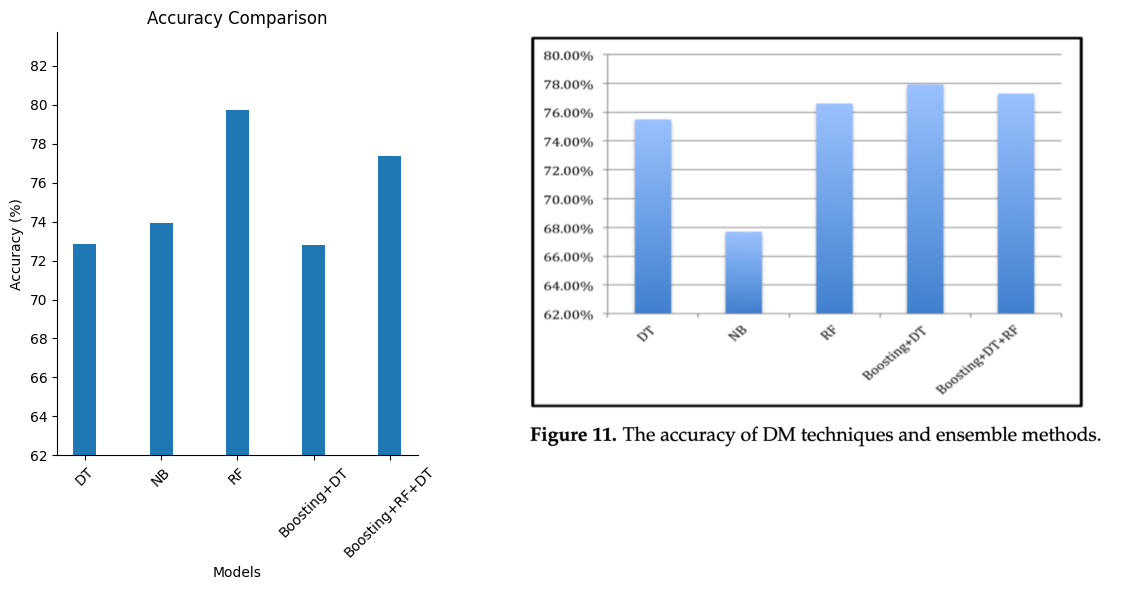

In [14]:
# Code to plot my models accuracy:

selected_models = ['DT', 'NB', 'RF', 'Boosting+DT', 'Boosting+RF+DT']
accuracies = [results[model][0] for model in selected_models]

# Load in og figure
img = mpimg.imread('images/accuracy of dm and dt ensemble.png')

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]})

# Plot the bar chart for accuracies
ax[0].bar(selected_models, accuracies, width=0.3)
ax[0].set_title("Accuracy Comparison")
ax[0].set_xlabel("Models")
ax[0].set_ylabel("Accuracy (%)")
ax[0].set_ylim(62.00)
ax[0].set_yticks(range(62, int(max(accuracies) + 4), 2))
ax[0].tick_params(axis='x', rotation=45)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Display the image
ax[1].imshow(img)
ax[1].axis("off")  # Turn off axes for the image

# Adjust layout and show the plot
plt.tight_layout()


My findings show something different - boosting with a decision tree actually led to slightly less accuracy than the decision tree alone. Additionally, though boosting with the decision tree and random forest yielded a higher accuracy than a decision tree alone, it was still lower than a random forest alone. In fact, the model that yielded the highest accuracy was:

#### Precision

I then plotted their precisions side-by-side to compare my results to those of the authors.

[0.737, 0.749, 0.807]


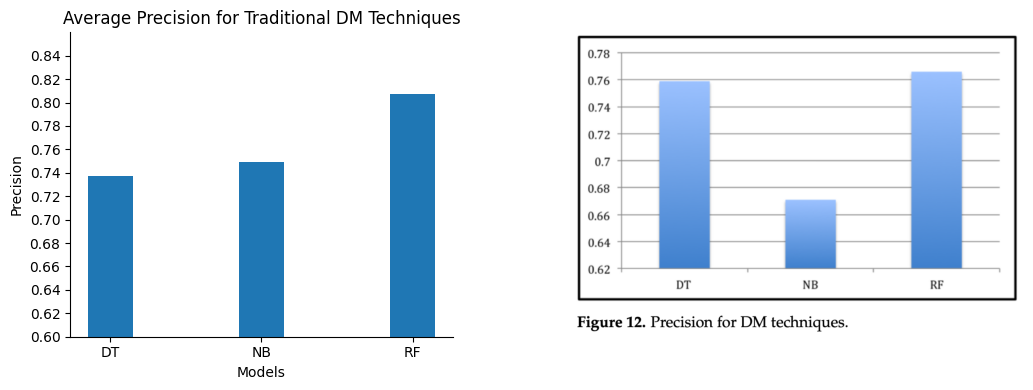

In [36]:
def frange(start, stop, step):
    while start < stop:
        yield round(start, 10)  # Avoid floating-point inaccuracies
        start += step

# Select models and their precision values
models = list(results.keys())[0:3]
precisions = [metrics[1] for metrics in results.values()][0:3]

# Load the image
img = mpimg.imread('images/precision for traditional dm techniques.png')

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 2]})

# Plotting the bar chart
ax[0].bar(models, precisions, width=0.3)
ax[0].set_ylim(0.6, round(max(precisions) + 0.05, 2))
ax[0].set_yticks([round(tick, 2) for tick in frange(0.6, round(max(precisions) + 0.05, 2), 0.02)])
ax[0].set_title('Average Precision for Traditional DM Techniques')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Precision')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Display the image on the second subplot
ax[1].imshow(img)
ax[1].axis('off')  # Hide the axis for the image

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


The original findings are plotted on the left, mine are on the right.

Though I obtained different numerical results, the authors' finding that the random forest outperformed the other methods was reproduced in my project. 

[0.737, 0.749, 0.807, 0.736, 0.749, 0.808, 0.765, 0.798, 0.806, 0.776, 0.75, 0.805, 0.797, 0.798, 0.798]


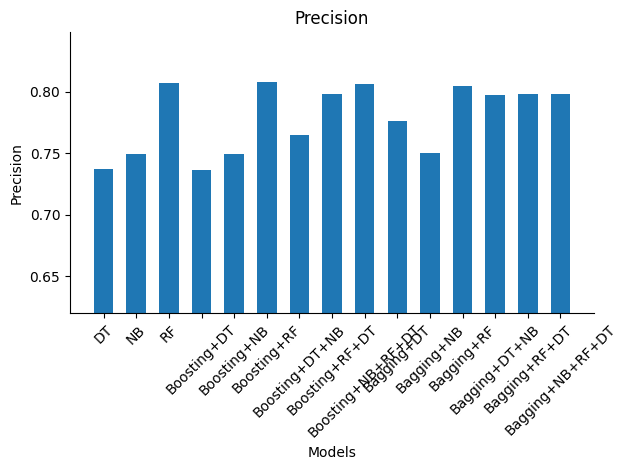

In [32]:
# Code to plot all precision:

precision = [model[1] for model in results.values()]
print(precision)

# Plot the bar chart for accuracies
plt.bar(results.keys(), precision, width=0.6)
plt.title("Precision")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim(0.62)
# plt.yticks(range(62, int(max(precision) + 4), 2)) 
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Adjust layout and show the plot
plt.tight_layout()

In [ ]:
results


### Exploratory analyses

Any follow-up analyses desired (not required).

## Discussion

### Summary of Replication Attempt

Open the discussion section with a paragraph summarizing the primary result from the confirmatory analysis and the assessment of whether it replicated, partially replicated, or failed to replicate the original result.

### Commentary

Add open-ended commentary (if any) reflecting (a) insights from follow-up exploratory analysis, (b) assessment of the meaning of the replication (or not) - e.g., for a failure to replicate, are the differences between original and present study ones that definitely, plausibly, or are unlikely to have been moderators of the result, and (c) discussion of any objections or challenges raised by the current and original authors about the replication attempt. None of these need to be long.